In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


# **Data Preprocessing**

### checking if the df contains null values

In [ ]:
df.isnull().any()

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

In [ ]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df.shape

(200, 6)

In [ ]:
df.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

 ### Detecting outliers using box plot

<Axes: >

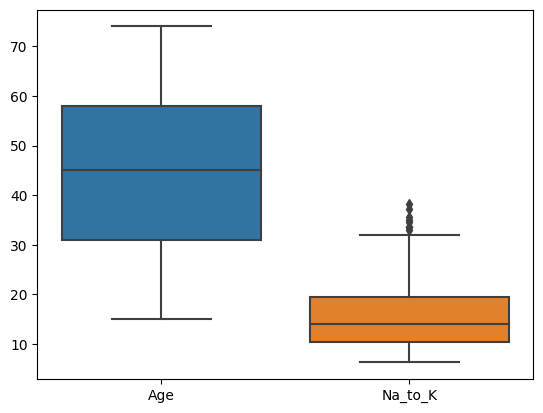

In [ ]:
sns.boxplot(df)

### Replacing outliers with median

In [ ]:
q1= df.Na_to_K.quantile(.25)
q3=df.Na_to_K.quantile(.75)

In [ ]:
q1

10.4455

In [ ]:
q3

19.38

In [ ]:
IQR = q3 - q1
IQR

8.9345

In [ ]:
upper_limit = q3 + 1.5*IQR 
lower_limit = q1 - 1.5*IQR
lower_limit

-2.9562500000000007

In [ ]:
df.median()

<ipython-input-42-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Age        45.0000
Na_to_K    13.9365
dtype: float64

In [ ]:
df['Na_to_K']= np.where(df['Na_to_K'] > upper_limit,14,df['Na_to_K'])

<Axes: >

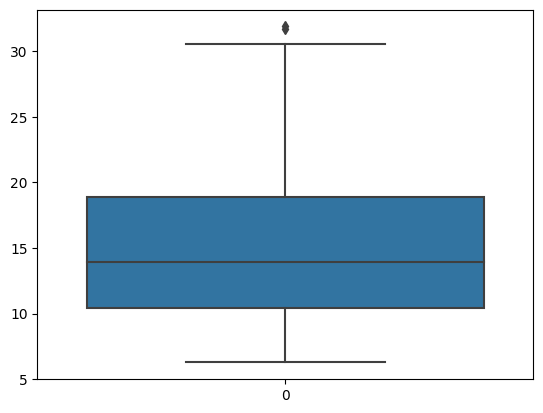

In [ ]:
sns.boxplot(df['Na_to_K'])

In [ ]:
x = df.iloc[:,0 : -1]
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [ ]:
y = df.iloc[:,-1]
y = pd.get_dummies(df.iloc[:,5:]).values 

In [ ]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=12)

### Encoding labeled columns with label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
cols=['Sex','BP','Cholesterol']

In [ ]:
for i in cols:
  xtrain[i] = le.fit_transform(xtrain[i])


In [ ]:
xtrain

,Age,Sex,BP,Cholesterol,Na_to_K
77,26,0,0,1,19.161
47,68,1,1,0,10.291
94,56,1,1,0,15.015
14,50,0,2,0,12.703
41,58,0,0,1,14.239
...,...,...,...,...,...
3,28,0,2,0,7.798
130,70,0,2,0,20.489
134,42,0,0,0,21.036
155,49,1,1,0,10.537


In [ ]:
for i in cols:
  xtest[i] = le.fit_transform(xtest[i])

In [ ]:
xtest

,Age,Sex,BP,Cholesterol,Na_to_K
23,48,0,1,0,15.036
182,20,0,1,1,11.686
172,39,0,2,1,17.225
21,63,1,2,0,25.917
63,45,1,1,1,8.370
11,34,0,0,1,19.199
61,24,1,0,1,9.475
32,49,1,1,1,11.014
164,16,1,0,1,19.007
7,41,1,1,0,11.037


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Building ANN

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=x.shape[1])) # Input layer 
model.add(Dense(16, activation='relu')) # Hidden layer 1 
model.add(Dense(8, activation='relu')) # Hidden layer 2
model.add(Dense(4, activation='relu')) # Hidden layer 3 
model.add(Dense(5, activation='softmax')) # Output layer

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                192       
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 4)                 36        
                                                                 
 dense_9 (Dense)             (None, 5)                 25        
                                                                 
Total params: 917
Trainable params: 917
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x.shape,y.shape

((200, 5), (200, 5))

In [ ]:
# Train the model
model.fit(xtrain, ytrain, epochs=10, batch_size=5, validation_data=(xtest, ytest))

Epoch 1/10
32/32 [==============================] - 0s 8ms/step - loss: 0.8423 - accuracy: 0.6812 - val_loss: 0.9035 - val_accuracy: 0.7000
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.8118 - accuracy: 0.7188 - val_loss: 0.9185 - val_accuracy: 0.7250
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 0.8073 - accuracy: 0.7375 - val_loss: 1.0090 - val_accuracy: 0.6750
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 0.8136 - accuracy: 0.7312 - val_loss: 0.9034 - val_accuracy: 0.7000
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 0.8027 - accuracy: 0.7000 - val_loss: 0.9208 - val_accuracy: 0.7000
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.7998 - accuracy: 0.7063 - val_loss: 0.9203 - val_accuracy: 0.7000
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7970 - accuracy: 0.7437 - val_loss: 0.9888 - val_accuracy: 0.7250
Epoch 8/10
32/32 [==

### Predicting

In [ ]:
ypred = model.predict(xtest)

2/2 [==============================] - 0s 4ms/step


In [ ]:
print (ypred)

[[8.18189144e-01 1.36508033e-01 2.21286174e-02 1.87015217e-02
  4.47265571e-03]
 [1.30194724e-01 1.40203714e-01 1.16832733e-01 1.17942601e-01
  4.94826287e-01]
 [6.35723948e-01 1.41465425e-01 6.88719749e-02 5.96592873e-02
  9.42792967e-02]
 [9.97227430e-01 2.63688131e-03 7.72610147e-05 5.79772968e-05
  4.76450850e-07]
 [7.19898865e-02 1.46484375e-01 1.18090220e-01 1.52576819e-01
  5.10858595e-01]
 [9.60718572e-01 3.45435366e-02 2.45150900e-03 2.18886347e-03
  9.75769435e-05]
 [2.91042089e-01 2.88525909e-01 1.22974515e-01 1.33759499e-01
  1.63697824e-01]
 [2.18132183e-01 2.60748208e-01 1.33001447e-01 1.41005114e-01
  2.47113049e-01]
 [9.96784925e-01 2.95977527e-03 8.36214531e-05 1.71173786e-04
  4.70028994e-07]
 [4.29731131e-01 3.02601755e-01 9.82287228e-02 9.04551595e-02
  7.89833665e-02]
 [3.06024432e-01 2.48953938e-01 1.22544490e-01 1.18569471e-01
  2.03907758e-01]
 [9.22428489e-01 5.97346127e-02 9.02734138e-03 7.38942344e-03
  1.42017577e-03]
 [6.28096521e-01 2.31732890e-01 5.918934

In [ ]:
print(model.predict([[68,1,0,0,10.291],[32,0,1,0,10.291],[28,0,0,1,10.291],[23,1,1,0,10.291],[38,1,0,1,10.291]]))

1/1 [==============================] - 0s 38ms/step
[[0.09177031 0.18506011 0.12621094 0.1896365  0.40732217]
 [0.17266521 0.2052613  0.12765464 0.13085583 0.36356294]
 [0.25425717 0.25312275 0.12138306 0.13072143 0.2405156 ]
 [0.227925   0.22140674 0.12474379 0.11607245 0.309852  ]
 [0.35386872 0.30114233 0.1003034  0.12525979 0.1194258 ]]
